In [229]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [230]:
file_path = 'chart.csv'
df = pd.read_csv(file_path)
df.head()

,action_type,author_name,author_title,author_member_duration,message,message_type,time_in_seconds,timestamp
0,add_chat_item,まyuwi,Member,30,Welcome,text_message,2.265,1725501344574131
1,add_chat_item,Regal Masquerade,Member,30,:woman_cook::cookie::cookie::cookie::cookie::c...,text_message,2.478,1725501344831776
2,add_chat_item,Turtor,Member,30,:_eyer::_lips::_eyel:,text_message,3.294,1725501345659610
3,add_chat_item,gracegg,NaN,0,As a new Rosarian I find it strange we do not ...,text_message,4.620,1725501346965488
4,add_chat_item,고구마,NaN,0,:_heart::_heart::_heart:,text_message,9.171,1725501351473667


In [231]:
onomatopoeic_words = ('lol', 'lmao+o*', 'lmfao+o*', 'huh+h*', 'wow', 'dang', 'rofl', '(ha)+', 'hehe', 'omg', 'oh', 'o7', 'bau', ':\\(', 'D:', 'XD+D*', 'wah', 'wha+a*',
                    'yeah', '^(m)+$', 'aw+w*', '草', 'lamo+o*', 'hm+m*', 'a(ha)+', 'hah', 'lo+o*l', 'wo+o*w+w*', 'uh+h*', 'nuh')
pattern = re.compile(r'\b(' + '|'.join(onomatopoeic_words) +
                    r')|(:[^:]+:)|(\(.*?\)[^\w\s]*)|(^\@\w+)|(^\?+$)\b', re.IGNORECASE)
messages = df['message'].apply(
    lambda x:  pattern.sub('', x).strip()).replace('', np.nan).dropna()
messages.nunique()

10666

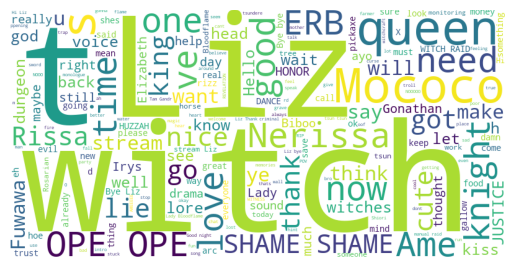

In [232]:
text = ' '.join(messages)

wordcloud = WordCloud(width=800, height=400, background_color='white', repeat=True).generate(text)

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

with open('msg.log', 'w', encoding='utf8') as f:
    for message in messages:
        if not len(message.strip()):
            continue
        f.write(f'{message}\n')